In [ ]:
from multiprocessing import shared_memory
#@title libraries import
import time

import matplotlib.pyplot as plt
import multiprocessing
import multiprocessing.shared_memory as shared_memory
import numpy as np
from mpl_toolkits import mplot3d 

In [ ]:
#@title Definitions

def plot_figure():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(X, Y, T[:,:,int(tf/dt)-1], cmap = 'gist_rainbow_r', edgecolor = 'none')
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    ax.set_zlabel('T [°]')
    plt.show()

def initial_condition():
    for i in range(0,nx-1):
        for j in range(1,ny-1):
            T[i,j,0] = T0

def boundary_conditions_set_up_nx(nx_position):
    T[nx_position,0,0]=T1
    T[nx_position,ny-1,0]=T2

def boundary_conditions_set_up_ny(ny_position):
    T[0,ny_position,0]=T3
    T[nx-1,ny_position,0]=T4

def main_loop_mp(pair):
    t, i = pair
    for j in range(1,(ny-1)):
        a=(T[i+1,j,t]-2*T[i,j,t]+T[i-1,j,t])/dx**2 # d2dx2
        b=(T[i,j+1,t]-2*T[i,j,t]+T[i,j-1,t])/dy**2 # d2dy2
        T[i,j,t+1]=k*dt*(a+b)+T[i,j,t]

Process Process-83:
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Process Process-84:
TypeError: boundary_conditions_set_up_nx() takes 1 positional argument but 4 were given
Traceback (most recent call last):
  File "/usr/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/usr/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
TypeError: boundary_conditions_set_up_ny() takes 1 positional argument but 4 were given


[[0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 1. 1. 0.]
 [0. 0. 0. 0.]]
no changes


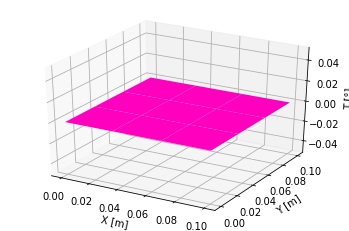

--- 0.24222588539123535 seconds ---


In [ ]:
#@title Parallel execution

if __name__ == '__main__':


    start_time = time.time()

    # Physical parameters
    k = 1.172E-5 # steel, 1% carbon
    Lx = 0.1 # length
    Ly = 0.1 # width

    # Numerical parameters
    nx = 40 # number of points in x direction
    ny = 40 # number of points in y direction
    dt = 0.1 # time step
    tf = 10 # final time

    # Boundary conditions (Dirichlet)
    T0=1; # internal field
    T1=0;
    T2=0;
    T3=0;
    T4=0;

    # x and y values
    X = None
    Y = None 

    # Computes cell length
    dx = Lx/nx;
    dy = Ly/ny;

    # Courant numbers
    r1 = k*dt/(dx**2);
    r2 = k*dt/(dy**2);

    if (r1 > 0.5 or r2 > 0.5):
        raise TypeError('Unstable Solution!')
    
    T = np.zeros((nx,ny,int(tf/dt)))


    initial_condition()
    procs = []
    procs.append(multiprocessing.Process(target=boundary_conditions_set_up_nx, args=(range(0,nx)),))
    procs.append(multiprocessing.Process(target=boundary_conditions_set_up_ny, args=(range(0,ny)),))

    [x.start() for x in procs]
    [x.join() for x in procs]

    multiprocessing.Process(target=boundary_conditions_set_up_nx, args=(range(0,nx))).start()

    map(lambda x: x.start(), procs):
    #   print(i)

    map(lambda x: x.join(), procs):
    #   print(i)

    X, Y = np.meshgrid(
            np.linspace(0, Lx, nx, endpoint=True),
            np.linspace(0, Ly, ny, endpoint=True)
        )

    arg_pairs = [(t,i) for t in range(0, int(tf/dt)-1) for i in range(1, (nx-1))]

    with multiprocessing.Pool(initargs=T) as pool:

        pool.imap(main_loop_mp, arg_pairs)

        plot_figure()

    print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
@jit